In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [229]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv.crdownload to gas_turbines.csv (3).crdownload


In [230]:
data = pd.read_csv("gas_turbines.csv.crdownload")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
14628,13.7500,1018.7,94.969,4.3132,24.492,1087.1,549.86,133.68,11.925,1.4978,71.876
14629,14.4370,1018.2,91.565,4.2418,24.414,1086.2,550.13,132.98,11.831,1.4116,71.962
14630,14.8040,1017.7,91.681,4.3177,24.814,1088.8,550.15,134.69,11.962,1.2813,72.831
14631,14.8880,1017.2,90.918,4.2366,24.478,1086.7,549.94,133.23,11.929,1.3871,72.380


In [231]:
data.shape

(14633, 11)

In [232]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,14633.000000,14633.000000,14633.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000,14632.000000
mean,17.957161,1013.145287,78.898475,4.203116,25.471093,1083.923107,545.319567,134.284328,12.113549,1.966553,67.916502
std,7.558694,6.298863,13.850971,0.766923,4.191365,16.564330,7.911442,15.918254,1.108437,2.239854,10.394357
min,0.522300,985.850000,9.000000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.635000,1009.000000,69.352000,3.719475,23.304750,1079.700000,541.720000,128.017500,11.627000,0.845460,61.132000
50%,18.487000,1012.800000,82.062000,4.192200,25.163500,1089.000000,549.890000,133.790000,12.039000,1.375100,66.347500
75%,24.000000,1016.900000,89.894000,4.561700,27.611750,1096.600000,550.060000,142.215000,12.697250,2.157375,73.310500
max,34.929000,1031.800000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    1
GTEP    1
TIT     1
TAT     1
TEY     1
CDP     1
CO      1
NOX     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14633 non-null  float64
 1   AP      14633 non-null  float64
 2   AH      14633 non-null  float64
 3   AFDP    14632 non-null  float64
 4   GTEP    14632 non-null  float64
 5   TIT     14632 non-null  float64
 6   TAT     14632 non-null  float64
 7   TEY     14632 non-null  float64
 8   CDP     14632 non-null  float64
 9   CO      14632 non-null  float64
 10  NOX     14632 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [233]:
data.fillna(0 ,inplace = True)

In [234]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [235]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.410219,-0.548741,-0.105538,-0.061549,0.080115,0.309511,-0.215732,-0.110668,-0.086943,-0.589574
AP,-0.410219,1.000000,0.043963,0.037417,0.077198,0.018257,-0.199816,0.142861,0.127353,0.043781,0.251376
AH,-0.548741,0.043963,1.000000,-0.117696,-0.194912,-0.196976,0.023613,-0.103147,-0.172537,0.165711,0.135417
AFDP,-0.105538,0.037417,-0.117696,1.000000,0.744173,0.571567,-0.474825,0.717459,0.726533,-0.330484,-0.025945
GTEP,-0.061549,0.077198,-0.194912,0.744173,1.000000,0.792592,-0.633492,0.977648,0.993173,-0.505278,-0.192299
TIT,0.080115,0.018257,-0.196976,0.571567,0.792592,1.000000,-0.040083,0.814927,0.820156,-0.599411,-0.170754
TAT,0.309511,-0.199816,0.023613,-0.474825,-0.633492,-0.040083,1.000000,-0.593169,-0.601813,0.060333,0.026142
TEY,-0.215732,0.142861,-0.103147,0.717459,0.977648,0.814927,-0.593169,1.000000,0.988637,-0.537018,-0.089162
CDP,-0.110668,0.127353,-0.172537,0.726533,0.993173,0.820156,-0.601813,0.988637,1.000000,-0.515825,-0.152162
CO,-0.086943,0.043781,0.165711,-0.330484,-0.505278,-0.599411,0.060333,-0.537018,-0.515825,1.000000,0.314192


In [236]:
data.duplicated().sum()

0

In [237]:
data.nunique()

AT      11806
AP        508
AH      12377
AFDP    11102
GTEP     8140
TIT       704
TAT      2329
TEY      4155
CDP      3597
CO      12823
NOX     11710
dtype: int64

## EDA

<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

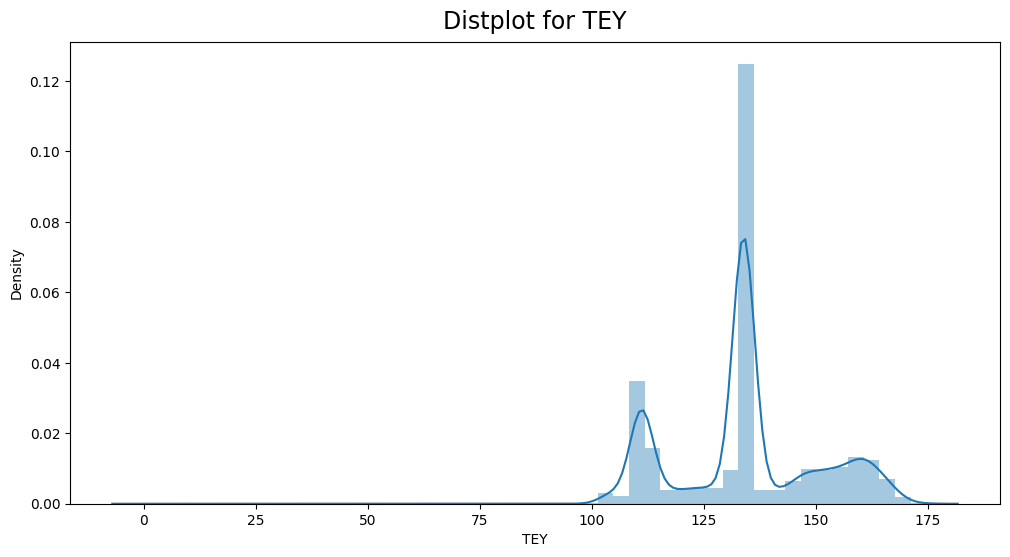

In [ ]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(data['TEY'])

<Axes: title={'center': 'Distplot for AT'}, xlabel='AT', ylabel='Density'>

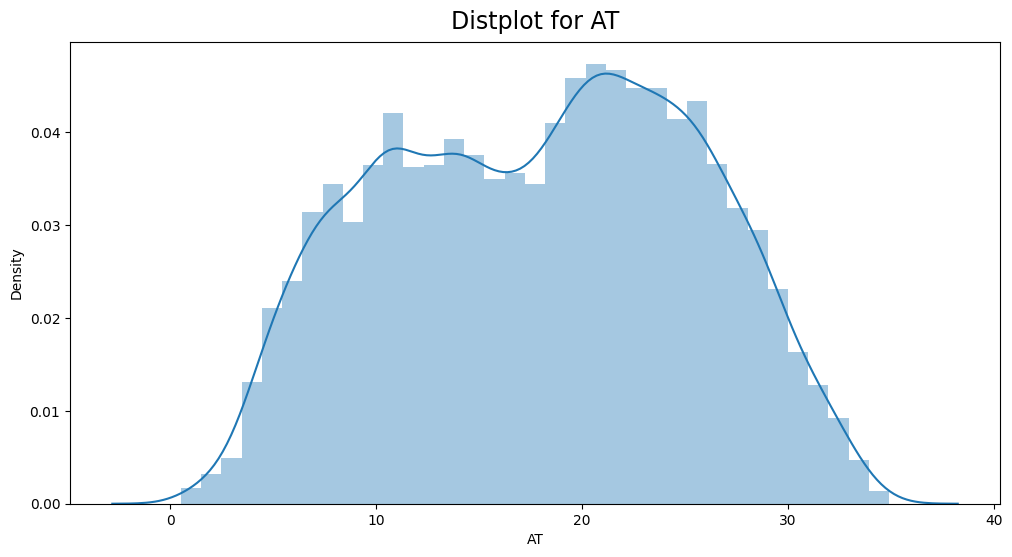

In [ ]:

plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(data['AT'])

<Axes: title={'center': 'Distplot for AP'}, xlabel='AP', ylabel='Density'>

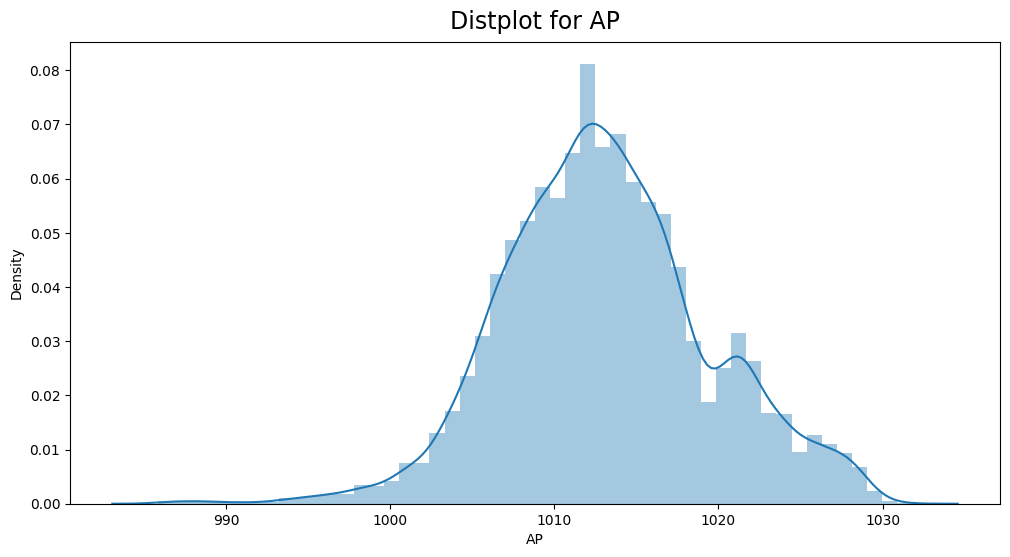

In [ ]:
plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(data['AP'])

<Axes: title={'center': 'Distplot for AH'}, xlabel='AH', ylabel='Density'>

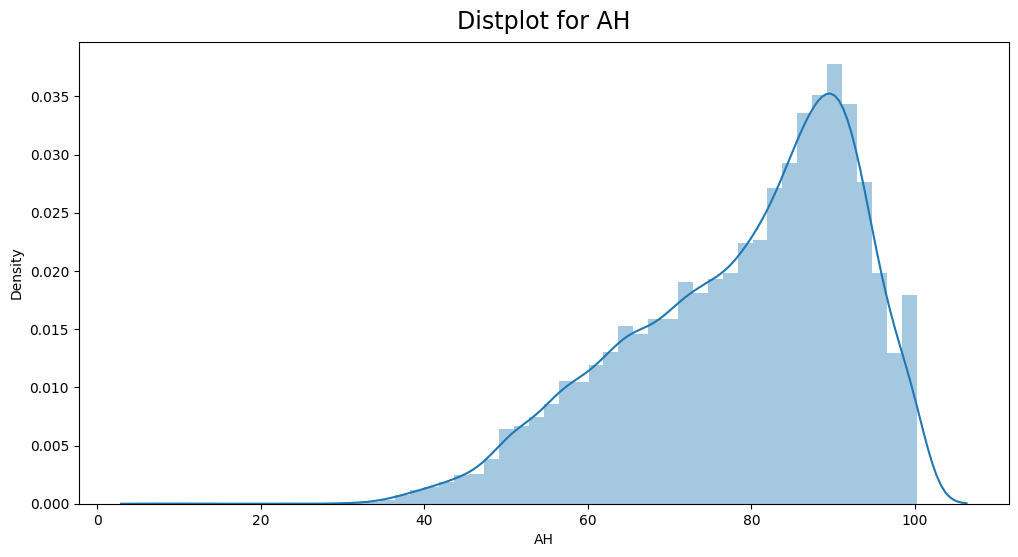

In [ ]:
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(data['AH'])

<Axes: title={'center': 'Distplot for AFDP'}, xlabel='AFDP', ylabel='Density'>

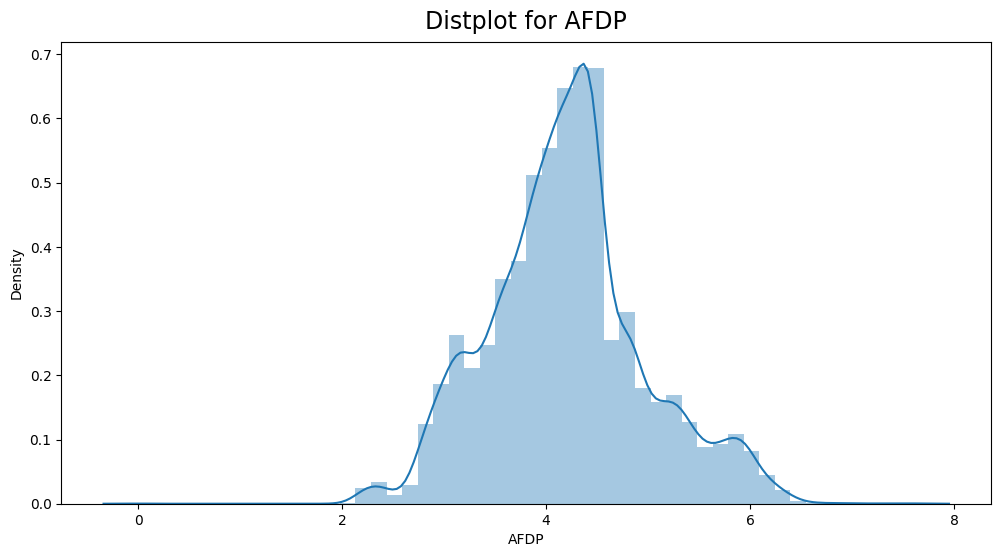

In [ ]:
plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(data['AFDP'])

<Axes: title={'center': 'Distplot for GTEP'}, xlabel='GTEP', ylabel='Density'>

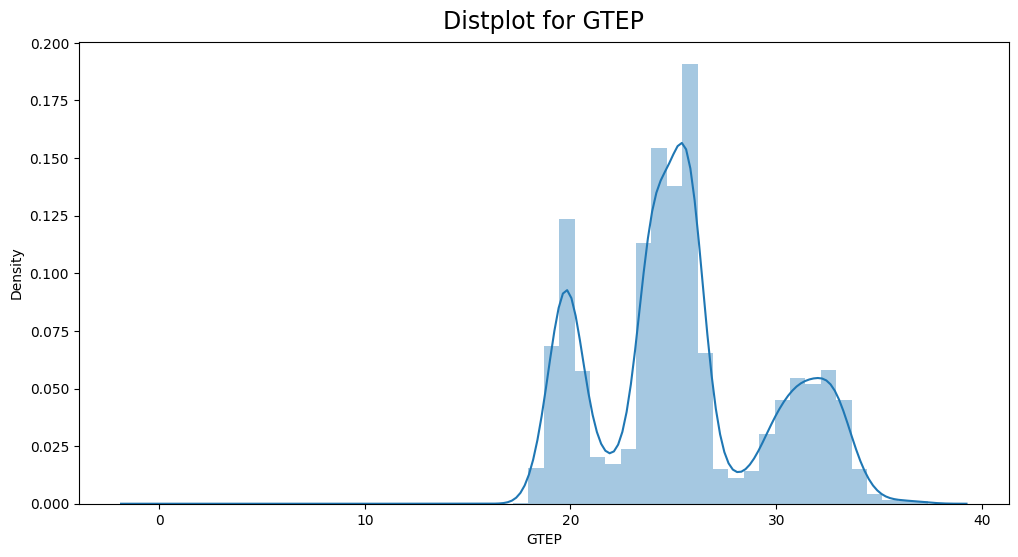

In [ ]:
plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(data['GTEP'])

<Axes: title={'center': 'Distplot for TIT'}, xlabel='TIT', ylabel='Density'>

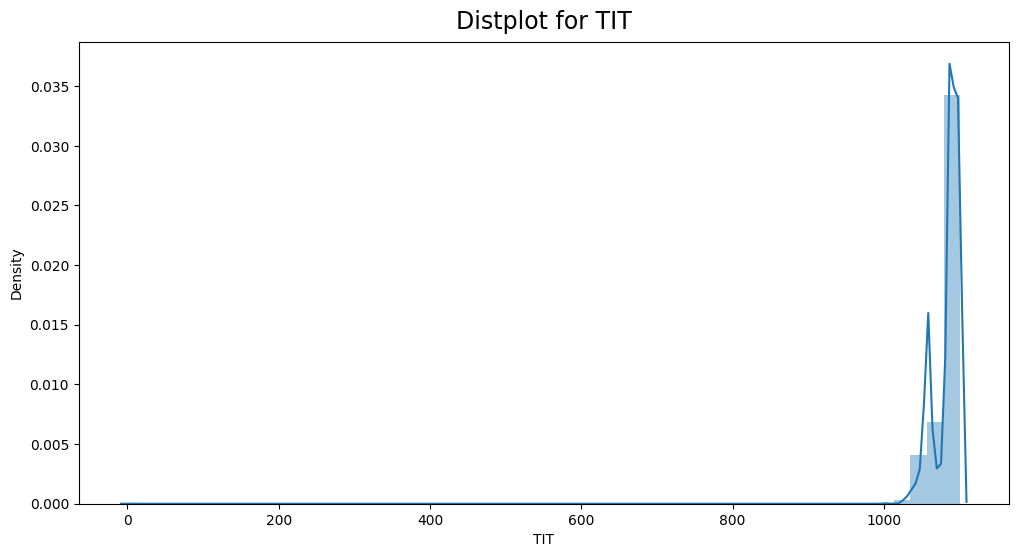

In [ ]:
plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(data['TIT'])

<Axes: title={'center': 'Distplot for TAT'}, xlabel='TAT', ylabel='Density'>

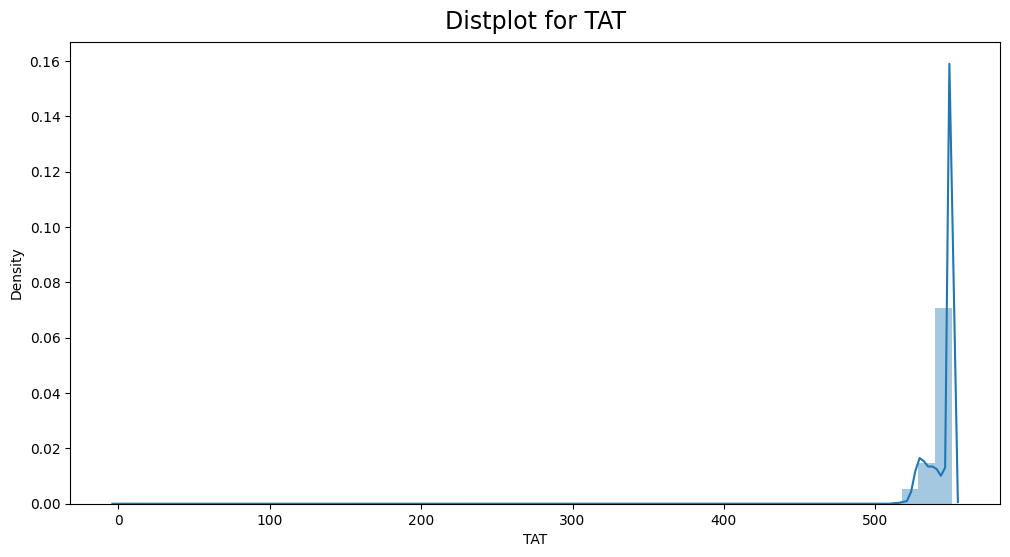

In [ ]:
plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(data['TAT'])

<Axes: title={'center': 'Distplot for CDP'}, xlabel='CDP', ylabel='Density'>

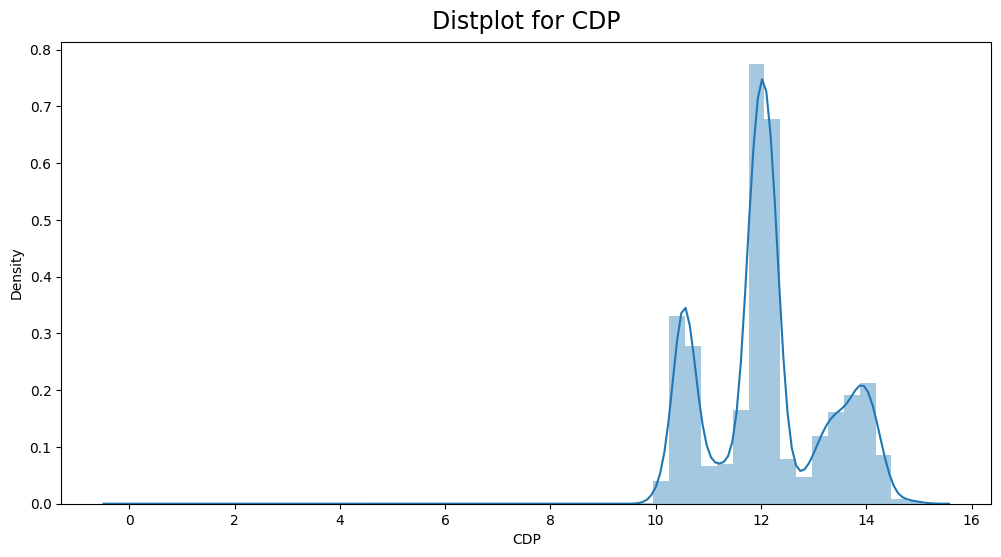

In [ ]:
plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(data['CDP'])

<Axes: title={'center': 'Distplot for CO'}, xlabel='CO', ylabel='Density'>

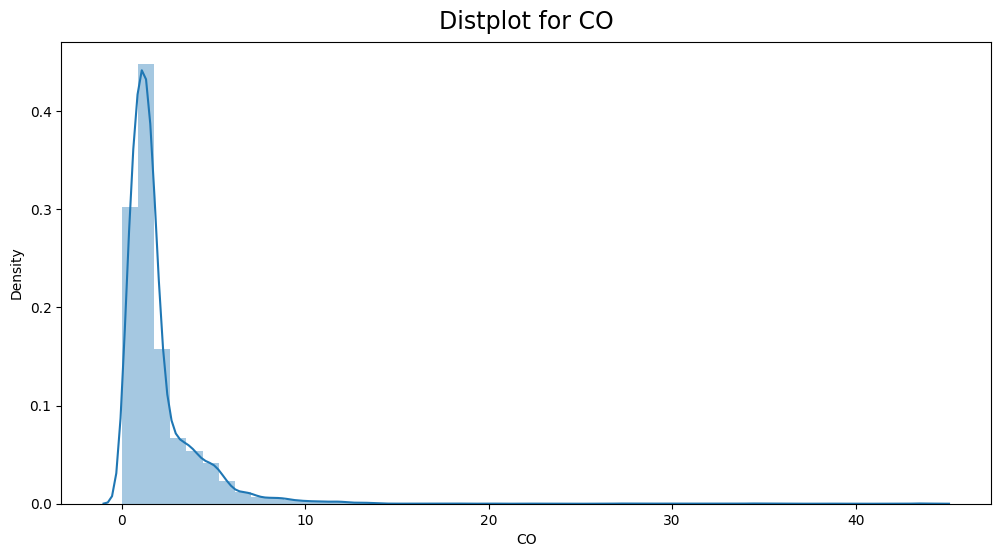

In [ ]:
plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(data['CO'])

<Axes: title={'center': 'Distplot for NOX'}, xlabel='NOX', ylabel='Density'>

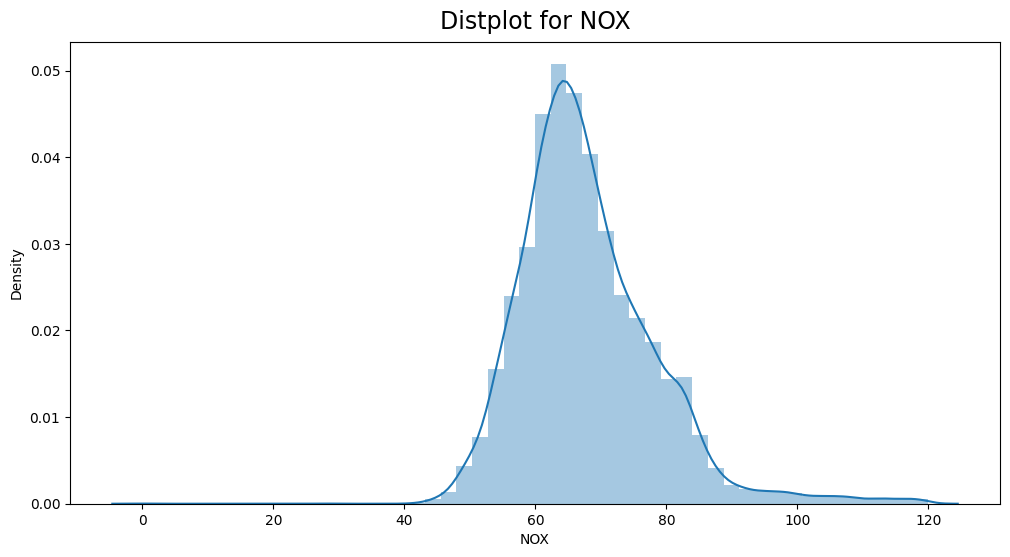

In [ ]:
plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(data['NOX'])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd81957940>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd809d77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd81957130>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd809d60b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd809d4a60>],
 'means': []}

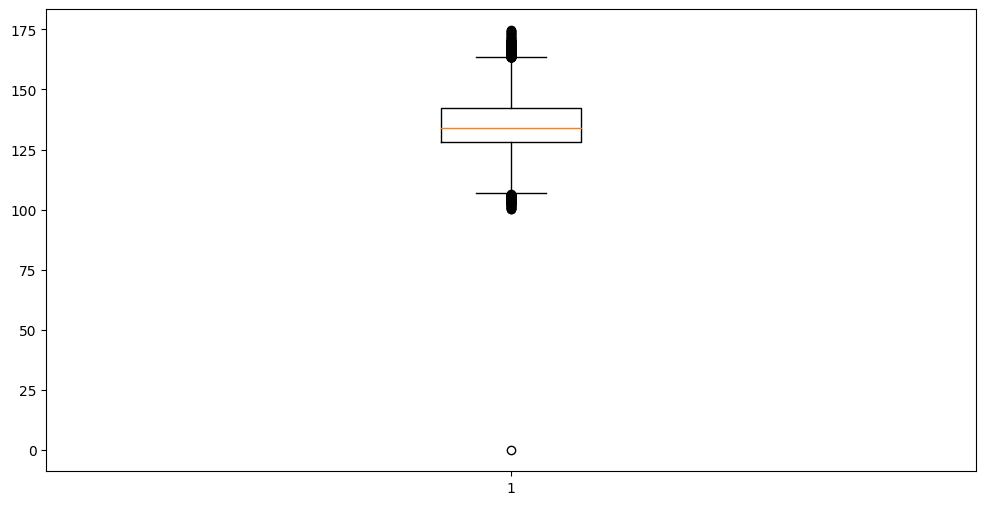

In [ ]:
plt.boxplot(data["TEY"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd8098f130>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd8098dbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd80f3f3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd8098eec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd8098f1f0>],
 'means': []}

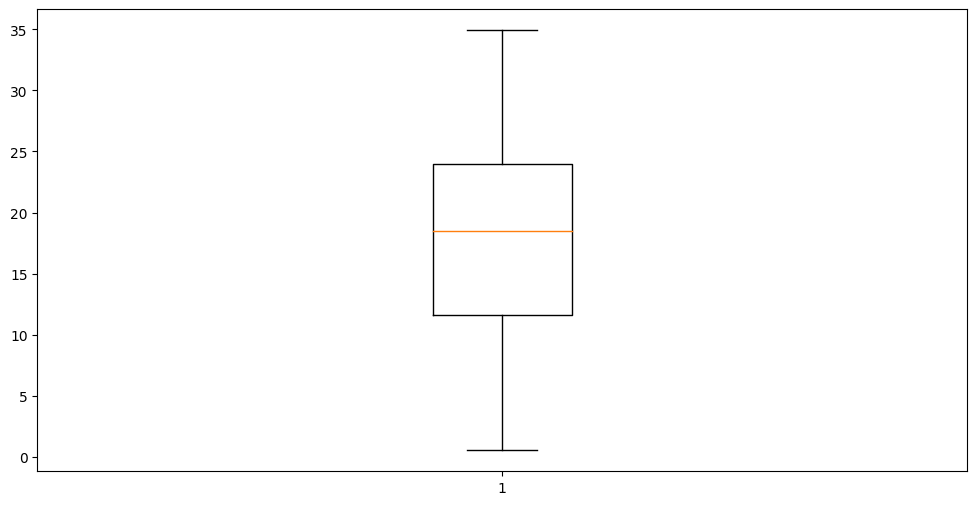

In [ ]:
plt.boxplot(data["AT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd801fbdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd801fb8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd801f8970>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd801f9540>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd801fa3b0>],
 'means': []}

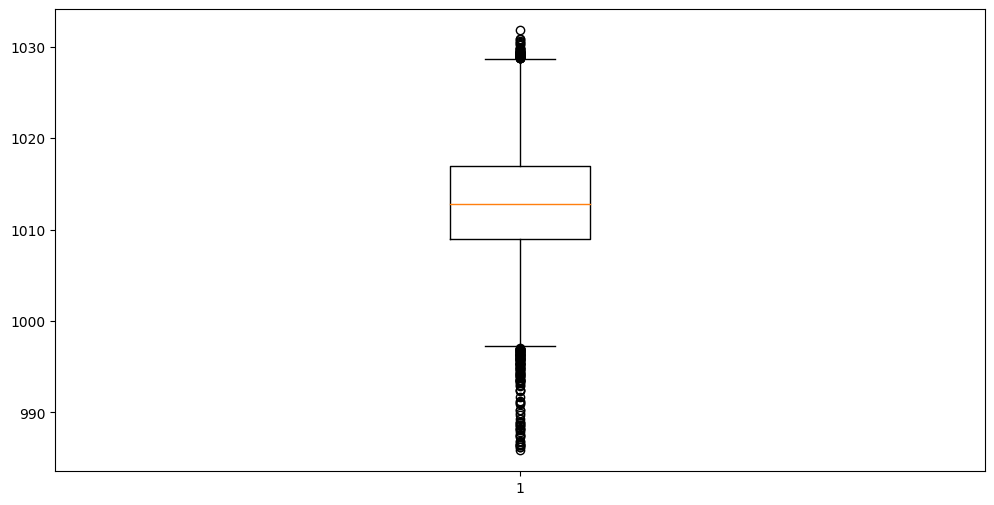

In [ ]:
plt.boxplot(data["AP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd801e2a70>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd801e30d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd801e0c70>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd801e3a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd801e13f0>],
 'means': []}

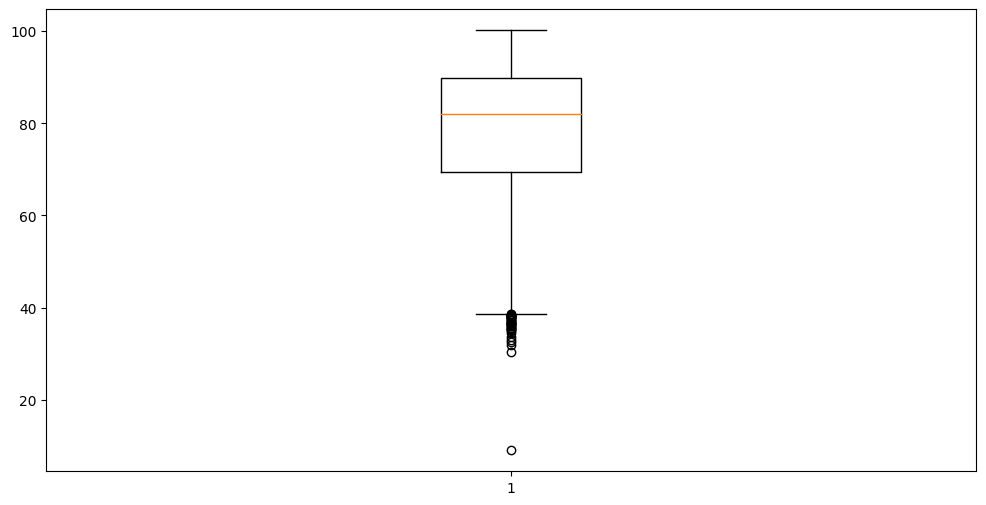

In [ ]:
plt.boxplot(data["AH"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd80b1c430>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd80b1f670>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd80b1fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd80b1f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd80b1d3c0>],
 'means': []}

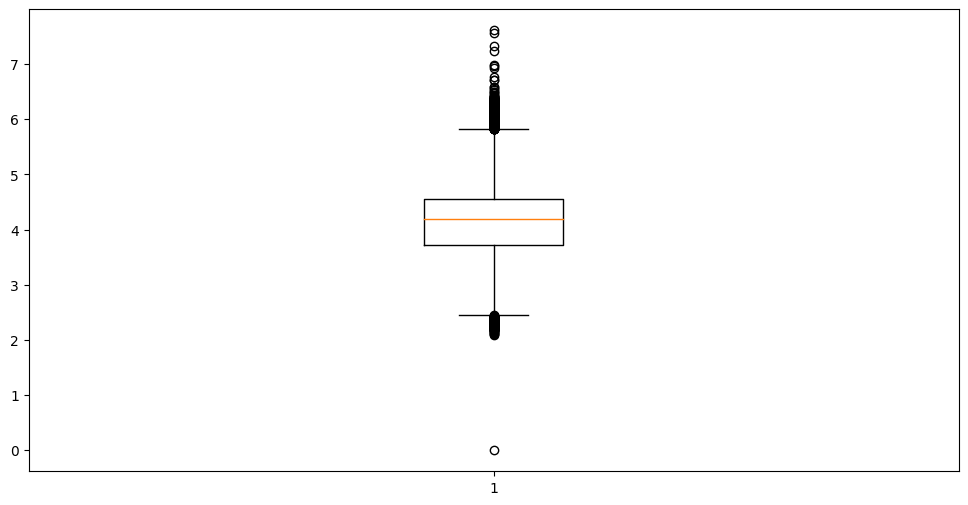

In [ ]:
plt.boxplot(data["AFDP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd7de71990>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd812658d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd7de728c0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd812665f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd812671c0>],
 'means': []}

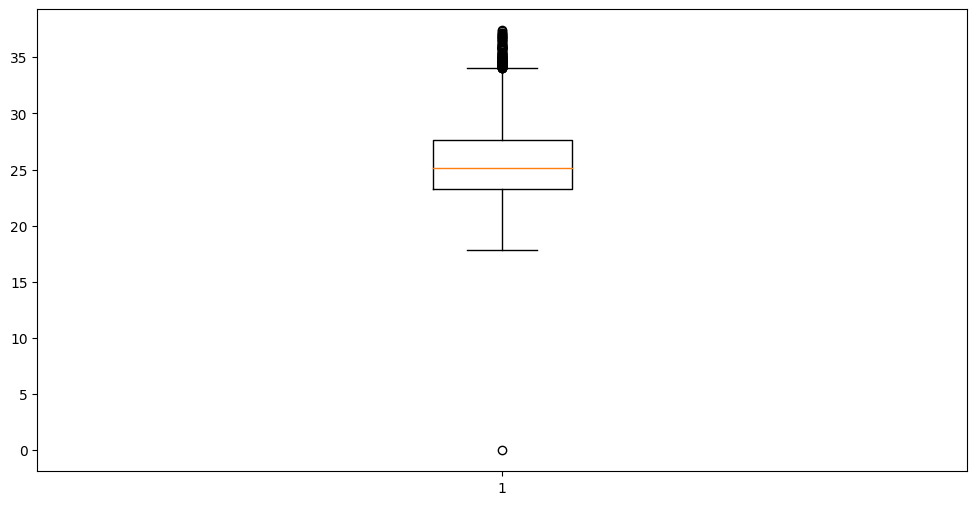

In [ ]:
plt.boxplot(data["GTEP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd818754b0>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd81875450>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd8048fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd818755a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd81876da0>],
 'means': []}

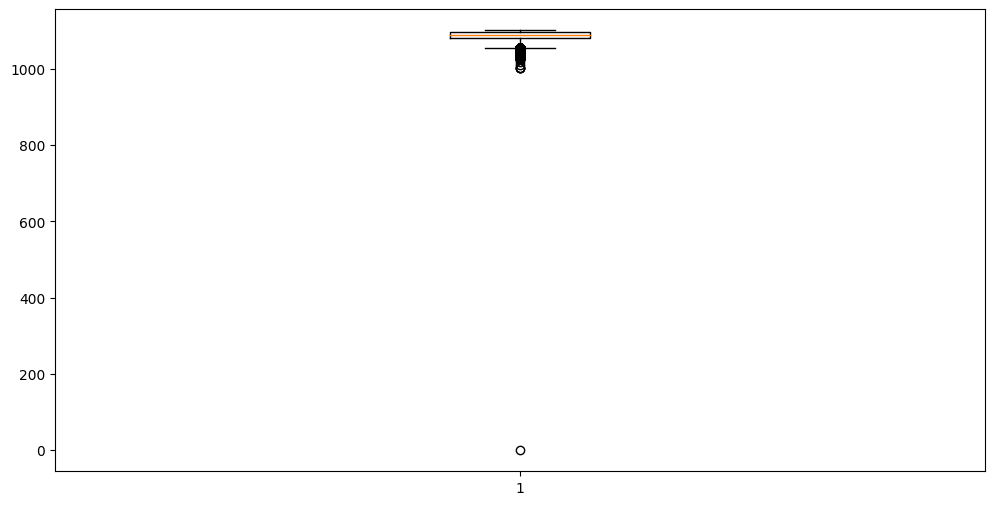

In [ ]:
plt.boxplot(data["TIT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd814403a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd83997dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd805befb0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd812ca170>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd814a31c0>],
 'means': []}

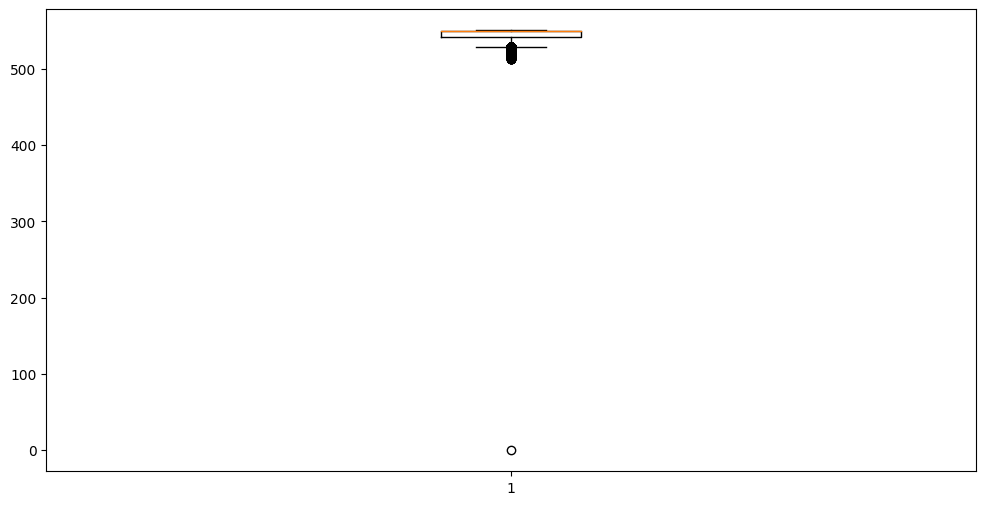

In [ ]:
plt.boxplot(data["TAT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd801c0a90>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd801c3fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd801c1ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd801c2f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd801c1f60>],
 'means': []}

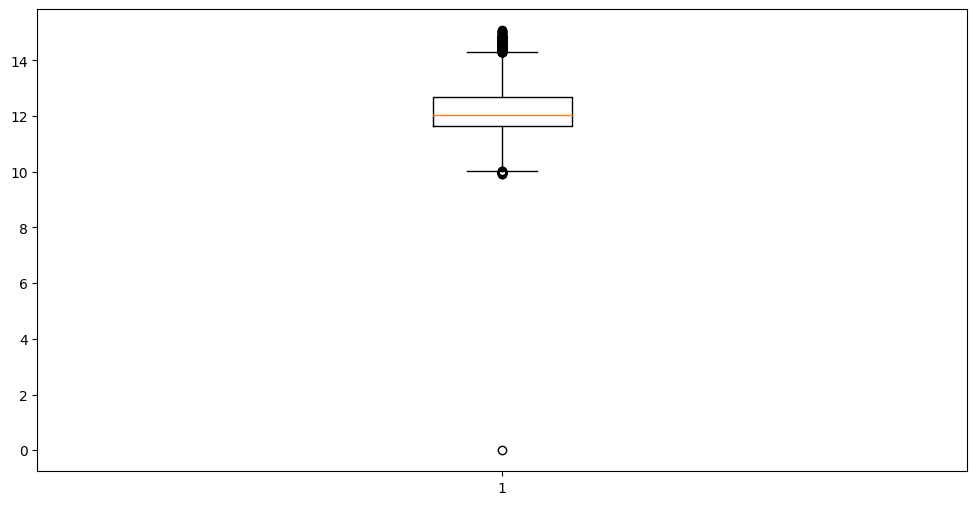

In [ ]:
plt.boxplot(data["CDP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd8022d5a0>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd8022f670>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd8022f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd8022f310>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd8022f910>],
 'means': []}

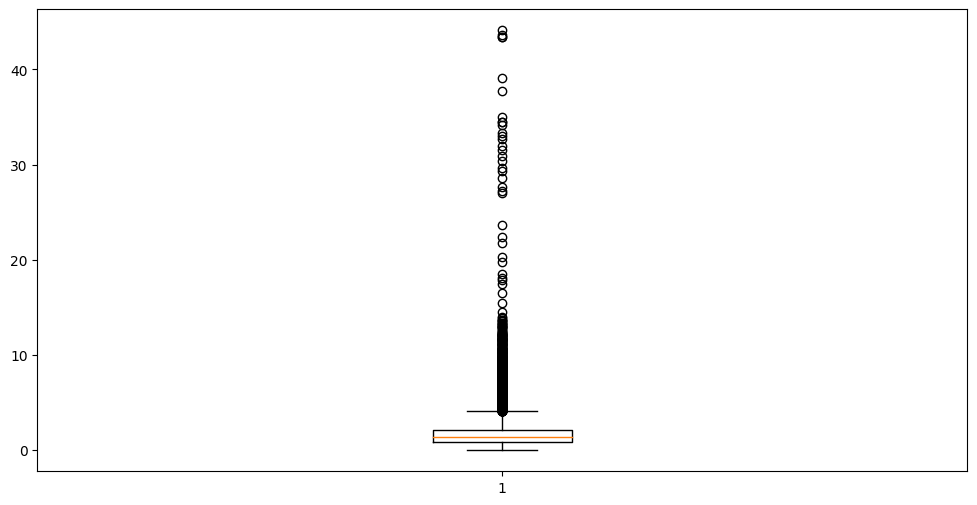

In [ ]:
plt.boxplot(data["CO"])

{'whiskers': [<matplotlib.lines.Line2D at 0x79fd800d53f0>,
 'caps': [<matplotlib.lines.Line2D at 0x79fd8160b820>,
 'boxes': [<matplotlib.lines.Line2D at 0x79fd800d7910>],
 'medians': [<matplotlib.lines.Line2D at 0x79fd80b1eda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79fd7dd2aad0>],
 'means': []}

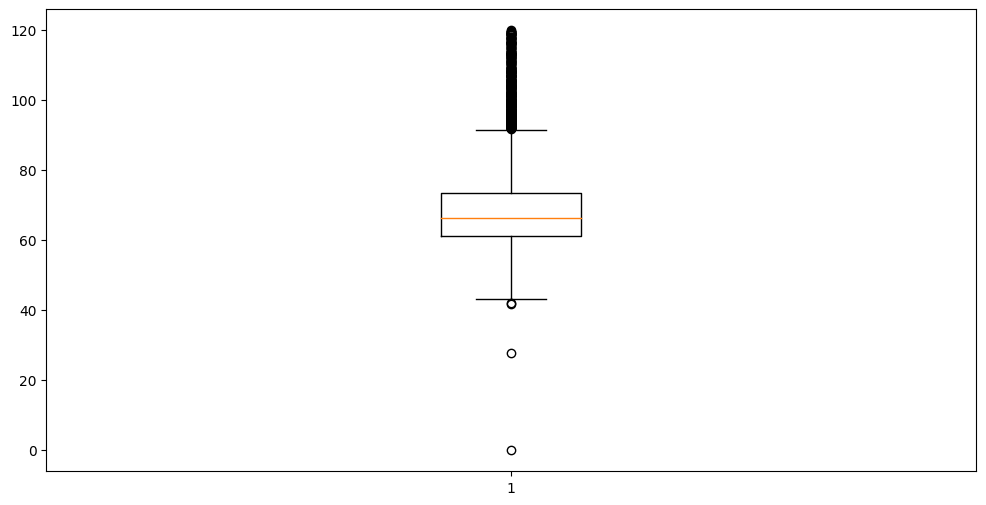

In [ ]:
plt.boxplot(data["NOX"])

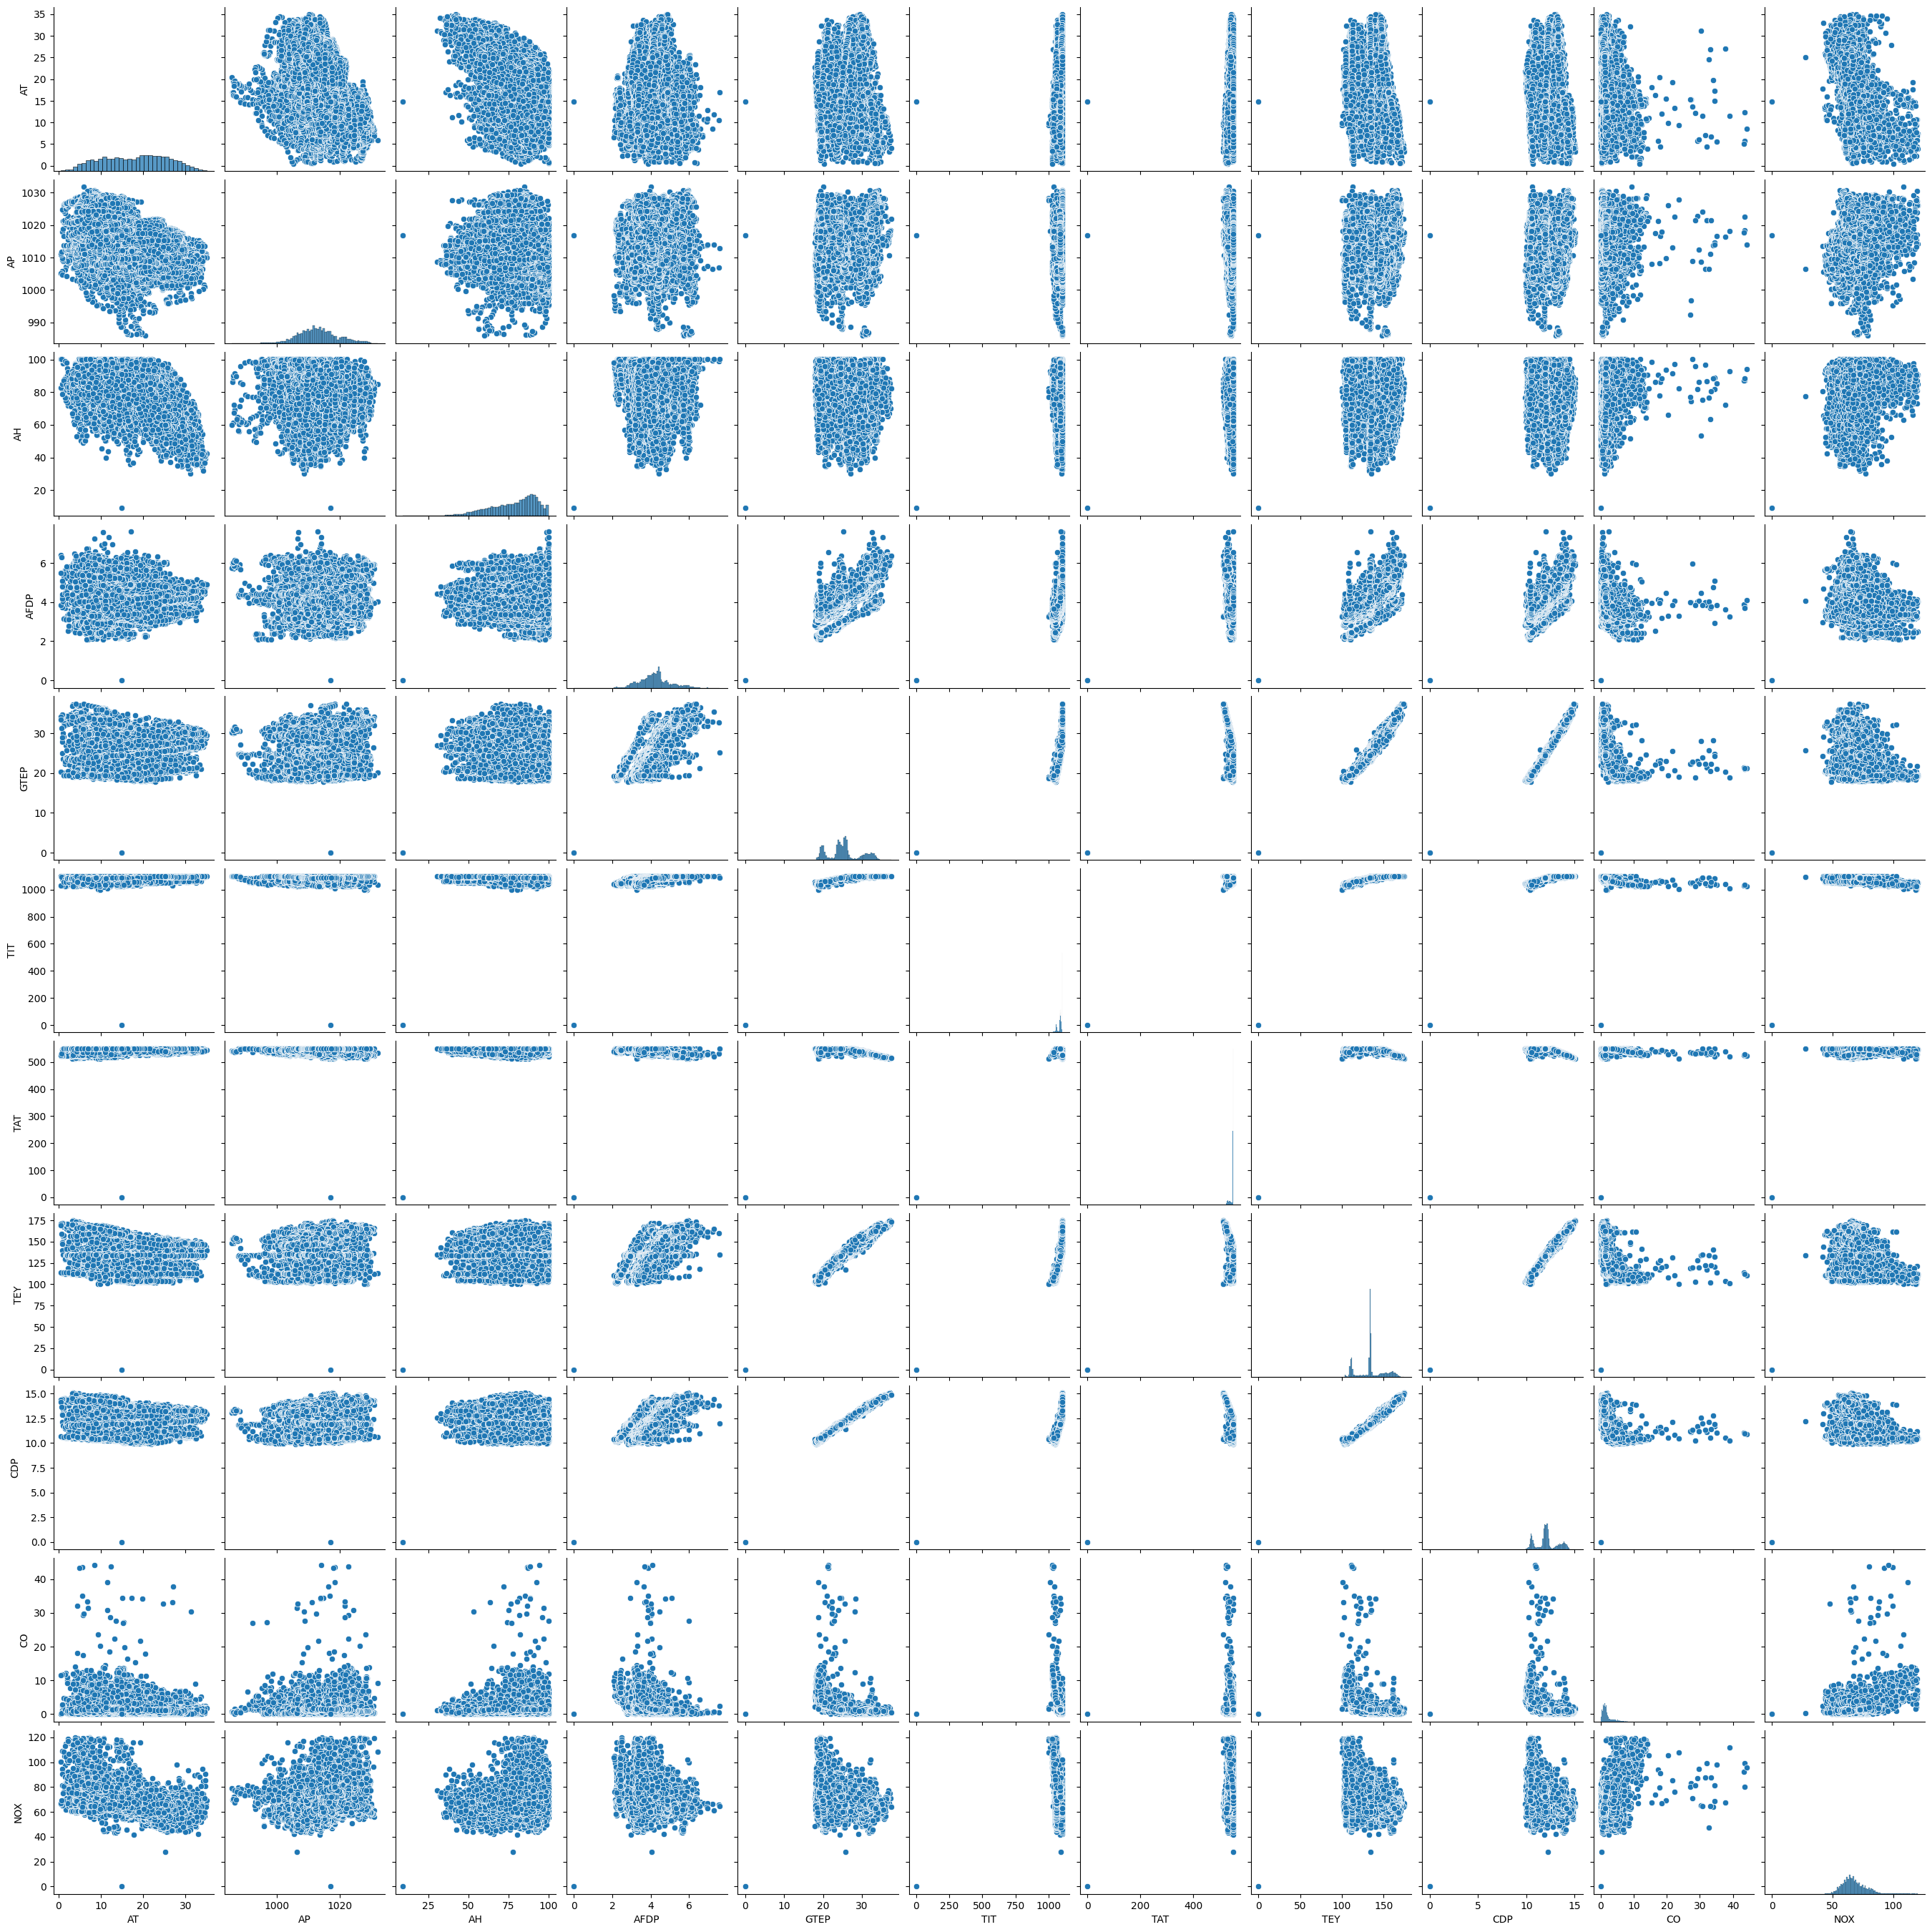

In [ ]:
# Pairplot
sns.pairplot(data)

In [238]:
corr = pd.DataFrame(data = data.corr().iloc[:,7], index=data.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988637
GTEP,0.977648
TIT,0.814927
AFDP,0.717459
AP,0.142861
NOX,-0.089162
AH,-0.103147
AT,-0.215732
CO,-0.537018


<Axes: title={'center': 'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

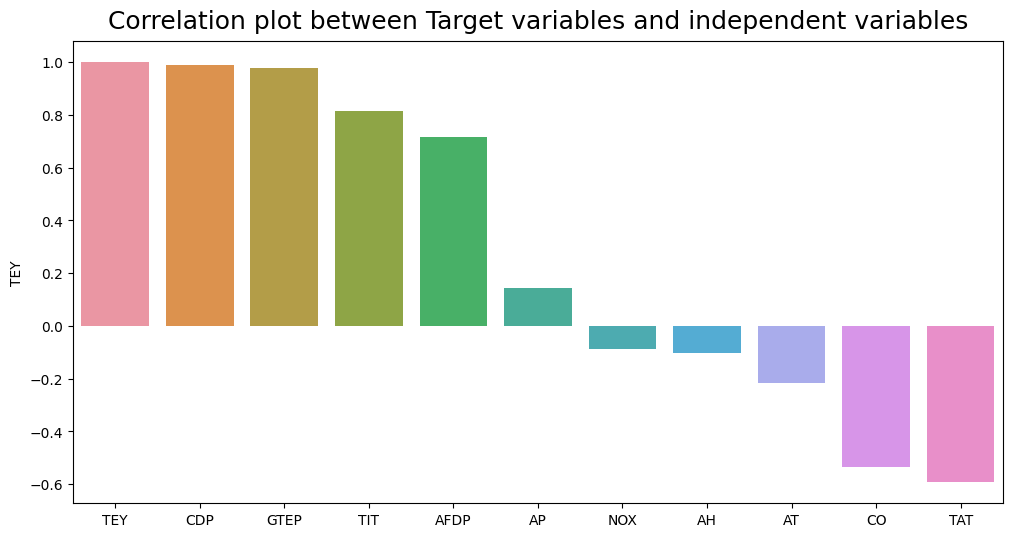

In [239]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)

Text(0.5, 1.0, 'Correlation Map of variables')

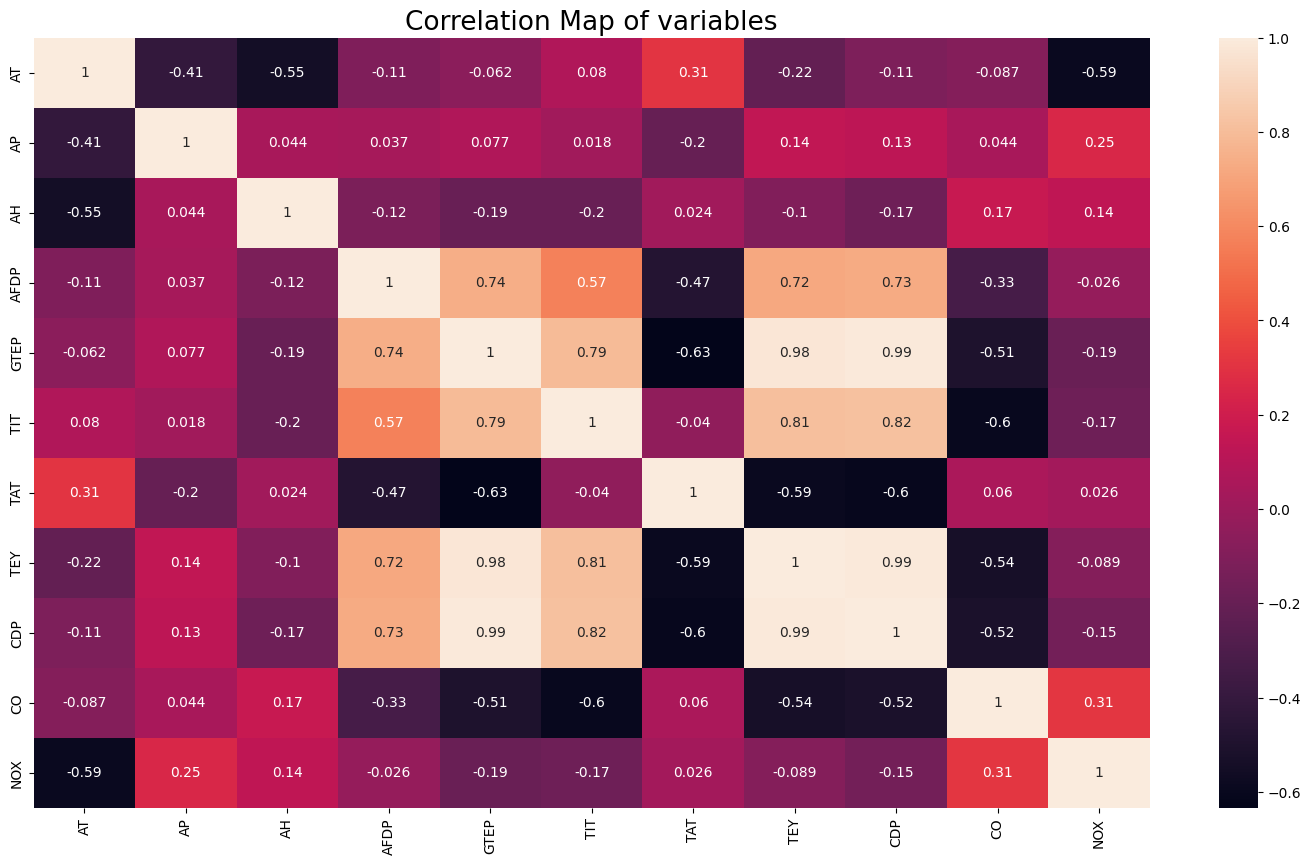

In [240]:
fig= plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=90)
plt.title("Correlation Map of variables", fontsize=19)

In [241]:
# Check For Outliers
from sklearn.ensemble import IsolationForest
data1=data.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:11])
outliers = data1[data1['anamoly']==-1]
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
763,1.8130,1007.2,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.94,-1
13820,14.1830,1023.1,78.110,3.1557,18.869,1025.0,530.16,103.80,10.340,13.3130,116.34,-1
13821,14.4770,1023.4,73.222,3.1559,18.733,1026.9,531.56,103.81,10.335,13.6000,117.35,-1
13822,15.0370,1023.5,68.874,3.1067,18.602,1029.5,533.68,103.81,10.329,12.8220,114.97,-1
13823,15.4230,1023.7,70.590,3.1464,18.656,1028.7,532.97,103.81,10.323,13.1260,110.78,-1
13824,15.4070,1023.6,70.472,3.1408,18.753,1027.4,532.00,103.81,10.318,13.6570,109.31,-1
13825,15.3310,1023.2,70.497,3.1295,18.719,1027.2,531.75,103.80,10.317,13.5430,109.25,-1
13826,15.2650,1023.0,70.821,3.1457,18.739,1027.4,532.05,103.80,10.323,13.2790,110.39,-1
13829,14.5860,1022.1,77.450,3.1414,18.675,1026.8,531.92,103.81,10.299,13.0490,113.10,-1
13921,11.5850,1018.2,92.751,3.2518,18.784,1009.5,519.71,100.83,10.253,39.0500,111.78,-1


## Data Preprocessing

In [242]:
data.shape

(14633, 11)

In [243]:
# Drop Outliers
data = data.drop(outliers.index)
data.shape

(14618, 11)

In [244]:
# Reset index after removing Outliers
data = data.reset_index()
data = data.drop("index" , axis = 1)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
14613,12.6950,1018.6,98.101,4.4019,24.385,1086.9,550.05,133.77,11.984,1.4634,72.507
14614,13.7500,1018.7,94.969,4.3132,24.492,1087.1,549.86,133.68,11.925,1.4978,71.876
14615,14.4370,1018.2,91.565,4.2418,24.414,1086.2,550.13,132.98,11.831,1.4116,71.962
14616,14.8040,1017.7,91.681,4.3177,24.814,1088.8,550.15,134.69,11.962,1.2813,72.831


Converting independent features into normalised and standardized data

In [249]:
#Standardize & Normalize the data
from sklearn.preprocessing import MinMaxScaler , StandardScaler
norm = MinMaxScaler()
std = StandardScaler()

df_norm = pd.DataFrame(norm.fit_transform(data), columns=data.columns) #data between -3 to +3
df_std = pd.DataFrame(std.fit_transform(data), columns=data.columns) #data between -1 to +1


Take a smaller sample to build a model

In [251]:
#we will take a small model as this is large data and will take huge amount of time to build model
#to reandomly shuffle and select a % of data
temp = df_std.sample(frac=1)          #shuffle all the data
temp_s = df_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
temp_s

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
10757,0.239847,-0.069376,0.700337,-0.708196,-0.191571,0.213733,0.580706,-0.086999,-0.136527,-0.434565,-0.727473
2798,0.598617,-0.832043,-0.491148,-0.393585,-0.089859,0.207657,0.617449,-0.093289,-0.122081,-0.369065,-0.246825
8390,-1.310895,1.265291,0.540547,1.295819,1.845763,0.973281,-2.403064,1.918929,1.824449,-0.777736,-0.606365
3100,1.266416,0.645624,-1.949190,-0.004234,0.123830,0.560087,0.587041,-0.032275,-0.013740,-0.112777,0.292340
701,-0.430466,-1.165710,-1.238590,-0.472629,-1.404230,-1.785396,0.593376,-1.483412,-1.558505,0.544374,1.156595
...,...,...,...,...,...,...,...,...,...,...,...
11666,0.422142,0.470846,1.228320,-1.654507,-1.697665,-2.040605,0.600978,-1.841951,-1.638858,0.570062,-1.300214
8116,-1.272557,-0.371265,0.802047,1.048643,1.780582,0.991510,-2.221884,1.843448,1.838894,-0.573030,-0.129695
13519,0.727203,1.011069,-0.881664,1.065078,1.559491,0.961128,-1.813912,1.097436,1.512065,-0.294423,-0.805107
14478,0.410104,-0.641376,-0.986987,-0.283758,-0.541592,-0.314912,0.594643,-0.480763,-0.543709,0.077827,0.223731


In [252]:
# Splitting data into target variable and independent variables
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']

In [253]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
10757,0.239847,-0.069376,0.700337,-0.708196,-0.191571,0.213733,0.580706,-0.136527,-0.434565,-0.727473
2798,0.598617,-0.832043,-0.491148,-0.393585,-0.089859,0.207657,0.617449,-0.122081,-0.369065,-0.246825
8390,-1.310895,1.265291,0.540547,1.295819,1.845763,0.973281,-2.403064,1.824449,-0.777736,-0.606365
3100,1.266416,0.645624,-1.949190,-0.004234,0.123830,0.560087,0.587041,-0.013740,-0.112777,0.292340
701,-0.430466,-1.165710,-1.238590,-0.472629,-1.404230,-1.785396,0.593376,-1.558505,0.544374,1.156595
...,...,...,...,...,...,...,...,...,...,...
11666,0.422142,0.470846,1.228320,-1.654507,-1.697665,-2.040605,0.600978,-1.638858,0.570062,-1.300214
8116,-1.272557,-0.371265,0.802047,1.048643,1.780582,0.991510,-2.221884,1.838894,-0.573030,-0.129695
13519,0.727203,1.011069,-0.881664,1.065078,1.559491,0.961128,-1.813912,1.512065,-0.294423,-0.805107
14478,0.410104,-0.641376,-0.986987,-0.283758,-0.541592,-0.314912,0.594643,-0.543709,0.077827,0.223731


In [254]:
y

10757   -0.086999
2798    -0.093289
8390     1.918929
3100    -0.032275
701     -1.483412
           ...   
11666   -1.841951
8116     1.843448
13519    1.097436
14478   -0.480763
2321    -1.897304
Name: TEY, Length: 1462, dtype: float64

In [255]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =42 )

In [256]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1023, 10), (439, 10), (1023,), (439,))

## Tuning of HyperParameters
1. Batch size
2. Epochs

In [257]:
pip install sciKeras

In [173]:
pip install scikit-learn tensorflow

In [258]:
# Build a model
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier,KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')  #to use GPU for faster processing of model

[]

In [265]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [266]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

Here is the summary of the model:
Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_523 (Dense)           (None, 5)                 55        
                                                                 
 dense_524 (Dense)           (None, 6)                 36        
                                                                 
 dense_525 (Dense)           (None, 10)                70        
                                                                 
 dense_526 (Dense)           (None, 1)                 11        
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [267]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [268]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_527 (Dense)           (None, 32)                352       
                                                                 
 dense_528 (Dense)           (None, 32)                1056      
                                                                 
 dense_529 (Dense)           (None, 64)                2112      
                                                                 
 dense_530 (Dense)           (None, 128)               8320      
                                                                 
 dense_531 (Dense)           (None, 1)                 129       
                                                                 
Total params: 11969 (46.75 KB)
Trainable params: 11969 (46.75 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________

In [271]:
print("Predicted values:")
model2.predict(X_test[:10])

Predicted values:
1/1 [==============================] - 0s 174ms/step


array([[ 0.03102518],
       [ 0.03348719],
       [ 1.1181928 ],
       [-1.5074869 ],
       [ 1.6820136 ],
       [-0.04026235],
       [-0.01631523],
       [-0.8590406 ],
       [-0.03971464],
       [-1.1378125 ]], dtype=float32)

In [272]:
print('Actual values')
y_test[:10]

Actual values


4387     0.031256
4448     0.030627
2060     1.195562
2030    -1.489073
13770    1.703806
14460   -0.037936
6500    -0.018437
4845    -0.878929
3164    -0.055548
13049   -1.150034
Name: TEY, dtype: float64

In [273]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=300...................................


[CV 1/5; 1/9] END ....batch_size=30, epochs=300;, score=0.998 total time=  22.2s
[CV 2/5; 1/9] START batch_size=30, epochs=300...................................


[CV 2/5; 1/9] END ....batch_size=30, epochs=300;, score=0.998 total time=  21.9s
[CV 3/5; 1/9] START batch_size=30, epochs=300...................................


[CV 3/5; 1/9] END ....batch_size=30, epochs=300;, score=0.997 total time=  13.1s
[CV 4/5; 1/9] START batch_size=30, epochs=300...................................


[CV 4/5; 1/9] END ....batch_size=30, epochs=300;, score=0.997 total time=  21.9s
[CV 5/5; 1/9] START batch_size=30, epochs=300...................................


[CV 5/5; 1/9] END ....batch_size=30, epochs=300;, score=0.997 total time=  22.3s
[CV 1/5; 2/9] START batch_size=30, epochs=500...................................
[CV 1/5; 2/9] END ....batch_size=30, epochs=500;, score=0.999 total time=  20.4s
[CV 2/5; 2/9] START batch_size=30, epochs=500...................................


[CV 2/5; 2/9] END ....batch_size=30, epochs=500;, score=0.998 total time=  26.7s
[CV 3/5; 2/9] START batch_size=30, epochs=500...................................


[CV 3/5; 2/9] END ....batch_size=30, epochs=500;, score=0.997 total time=  22.1s
[CV 4/5; 2/9] START batch_size=30, epochs=500...................................


[CV 4/5; 2/9] END ....batch_size=30, epochs=500;, score=0.997 total time=  19.9s
[CV 5/5; 2/9] START batch_size=30, epochs=500...................................


[CV 5/5; 2/9] END ....batch_size=30, epochs=500;, score=0.997 total time=  22.0s
[CV 1/5; 3/9] START batch_size=30, epochs=800...................................


[CV 1/5; 3/9] END ....batch_size=30, epochs=800;, score=0.998 total time=  42.3s
[CV 2/5; 3/9] START batch_size=30, epochs=800...................................


[CV 2/5; 3/9] END ....batch_size=30, epochs=800;, score=0.997 total time=  31.9s
[CV 3/5; 3/9] START batch_size=30, epochs=800...................................


[CV 3/5; 3/9] END ....batch_size=30, epochs=800;, score=0.997 total time=  42.4s
[CV 4/5; 3/9] START batch_size=30, epochs=800...................................


[CV 4/5; 3/9] END ....batch_size=30, epochs=800;, score=0.997 total time=  42.6s
[CV 5/5; 3/9] START batch_size=30, epochs=800...................................


[CV 5/5; 3/9] END ....batch_size=30, epochs=800;, score=0.997 total time=  32.9s
[CV 1/5; 4/9] START batch_size=50, epochs=300...................................


[CV 1/5; 4/9] END ....batch_size=50, epochs=300;, score=0.993 total time=   8.6s
[CV 2/5; 4/9] START batch_size=50, epochs=300...................................


[CV 2/5; 4/9] END ....batch_size=50, epochs=300;, score=0.998 total time=  11.8s
[CV 3/5; 4/9] START batch_size=50, epochs=300...................................


[CV 3/5; 4/9] END ....batch_size=50, epochs=300;, score=0.995 total time=  11.6s
[CV 4/5; 4/9] START batch_size=50, epochs=300...................................


[CV 4/5; 4/9] END ....batch_size=50, epochs=300;, score=0.997 total time=  11.6s
[CV 5/5; 4/9] START batch_size=50, epochs=300...................................


[CV 5/5; 4/9] END ....batch_size=50, epochs=300;, score=0.996 total time=  11.6s
[CV 1/5; 5/9] START batch_size=50, epochs=500...................................


[CV 1/5; 5/9] END ....batch_size=50, epochs=500;, score=0.998 total time=  14.7s
[CV 2/5; 5/9] START batch_size=50, epochs=500...................................


[CV 2/5; 5/9] END ....batch_size=50, epochs=500;, score=0.998 total time=  14.4s
[CV 3/5; 5/9] START batch_size=50, epochs=500...................................


[CV 3/5; 5/9] END ....batch_size=50, epochs=500;, score=0.997 total time=  17.1s
[CV 4/5; 5/9] START batch_size=50, epochs=500...................................


[CV 4/5; 5/9] END ....batch_size=50, epochs=500;, score=0.997 total time=  22.0s
[CV 5/5; 5/9] START batch_size=50, epochs=500...................................


[CV 5/5; 5/9] END ....batch_size=50, epochs=500;, score=0.997 total time=  21.9s
[CV 1/5; 6/9] START batch_size=50, epochs=800...................................


[CV 1/5; 6/9] END ....batch_size=50, epochs=800;, score=0.999 total time=  24.9s
[CV 2/5; 6/9] START batch_size=50, epochs=800...................................


[CV 2/5; 6/9] END ....batch_size=50, epochs=800;, score=0.998 total time=  42.4s
[CV 3/5; 6/9] START batch_size=50, epochs=800...................................


[CV 3/5; 6/9] END ....batch_size=50, epochs=800;, score=0.996 total time=  24.3s
[CV 4/5; 6/9] START batch_size=50, epochs=800...................................


[CV 4/5; 6/9] END ....batch_size=50, epochs=800;, score=0.996 total time=  23.4s
[CV 5/5; 6/9] START batch_size=50, epochs=800...................................


[CV 5/5; 6/9] END ....batch_size=50, epochs=800;, score=0.997 total time=  42.8s
[CV 1/5; 7/9] START batch_size=70, epochs=300...................................


[CV 1/5; 7/9] END ....batch_size=70, epochs=300;, score=0.999 total time=  11.6s
[CV 2/5; 7/9] START batch_size=70, epochs=300...................................


[CV 2/5; 7/9] END ....batch_size=70, epochs=300;, score=0.998 total time=   7.2s
[CV 3/5; 7/9] START batch_size=70, epochs=300...................................


[CV 3/5; 7/9] END ....batch_size=70, epochs=300;, score=0.994 total time=  11.6s
[CV 4/5; 7/9] START batch_size=70, epochs=300...................................


[CV 4/5; 7/9] END ....batch_size=70, epochs=300;, score=0.996 total time=  11.6s
[CV 5/5; 7/9] START batch_size=70, epochs=300...................................


[CV 5/5; 7/9] END ....batch_size=70, epochs=300;, score=0.997 total time=  11.6s
[CV 1/5; 8/9] START batch_size=70, epochs=500...................................


[CV 1/5; 8/9] END ....batch_size=70, epochs=500;, score=0.996 total time=  12.6s
[CV 2/5; 8/9] START batch_size=70, epochs=500...................................


[CV 2/5; 8/9] END ....batch_size=70, epochs=500;, score=0.998 total time=  21.8s
[CV 3/5; 8/9] START batch_size=70, epochs=500...................................


[CV 3/5; 8/9] END ....batch_size=70, epochs=500;, score=0.997 total time=  21.8s
[CV 4/5; 8/9] START batch_size=70, epochs=500...................................


[CV 4/5; 8/9] END ....batch_size=70, epochs=500;, score=0.997 total time=  12.3s
[CV 5/5; 8/9] START batch_size=70, epochs=500...................................


[CV 5/5; 8/9] END ....batch_size=70, epochs=500;, score=0.996 total time=  12.3s
[CV 1/5; 9/9] START batch_size=70, epochs=800...................................


[CV 1/5; 9/9] END ....batch_size=70, epochs=800;, score=0.998 total time=  18.0s
[CV 2/5; 9/9] START batch_size=70, epochs=800...................................


[CV 2/5; 9/9] END ....batch_size=70, epochs=800;, score=0.998 total time=  21.9s
[CV 3/5; 9/9] START batch_size=70, epochs=800...................................


[CV 3/5; 9/9] END ....batch_size=70, epochs=800;, score=0.996 total time=  22.2s
[CV 4/5; 9/9] START batch_size=70, epochs=800...................................


[CV 4/5; 9/9] END ....batch_size=70, epochs=800;, score=0.996 total time=  18.2s
[CV 5/5; 9/9] START batch_size=70, epochs=800...................................


[CV 5/5; 9/9] END ....batch_size=70, epochs=800;, score=0.996 total time=  19.0s


In [274]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9976642447901822, using {'batch_size': 30, 'epochs': 500}
0.9974633735535612,0.0006202545380204394 with: {'batch_size': 30, 'epochs': 300}
0.9976642447901822,0.0005878636015711093 with: {'batch_size': 30, 'epochs': 500}
0.9975209882540245,0.0004863537527225133 with: {'batch_size': 30, 'epochs': 800}
0.9957605806346332,0.0018874953663235137 with: {'batch_size': 50, 'epochs': 300}
0.9976019141405896,0.00035971167918518647 with: {'batch_size': 50, 'epochs': 500}
0.9971938797189907,0.0010832355367608158 with: {'batch_size': 50, 'epochs': 800}
0.9967657766129439,0.0015625273894782352 with: {'batch_size': 70, 'epochs': 300}
0.9967616921275054,0.0007985768574127841 with: {'batch_size': 70, 'epochs': 500}
0.9968374341935263,0.0010149585437346164 with: {'batch_size': 70, 'epochs': 800}


In [277]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model

def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 30,epochs = 500,learning_rate = learning_rate,dropout_rate = dropout_rate)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(X_test,y_test)

In [278]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9977418560554968, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9977418560554968,0.0003448802575997726 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9974656835355364,0.0007674037514665643 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9976611835103908,0.0006203380474524503 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9937846394410791,0.0028116345770237547 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9944603741855863,0.0021491455881960347 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9951408355858391,0.0014043430865214488 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9933692945117754,0.001821016759260519 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9944870663508987,0.0030313756620816345 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9926777876719217,0.0015095302956513717 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [281]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning

def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1))
    model.add(Dropout(0.0))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 30,epochs = 500,activation_function = activation_function,init = init)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(X_test,y_test)


In [282]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9978254934028697, using {'activation_function': 'linear', 'init': 'normal'}
0.26192015101487864,0.211543582729774 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9900349578296652,0.006605179324753738 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.008591211286262057,0.009786774075187719 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9975950448784869,0.0007778438479773012 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9975339193164396,0.000368470121971738 with: {'activation_function': 'relu', 'init': 'normal'}
-0.008210742282451822,0.009223042078440937 with: {'activation_function': 'relu', 'init': 'zero'}
0.9971443403315485,0.0009967488597408848 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9969469504835455,0.001088142414396555 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.007937266293866818,0.008740973853255566 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9977763397097078,0.000738622853003

In [286]:
# Defining the model
# get best value for neuron by hyperparameter tuning

def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1))
    model.add(Dropout(0.0))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 30,epochs = 500 , neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(X_test,y_test)

In [287]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9979325441939029, using {'neuron1': 16, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
0.9978052746286515,0.0008138958851160598 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 32}
0.9977500226561228,0.0008167651049623182 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 64}
0.9974453984568695,0.0005984198666701154 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 32, 'neuron4': 128}
0.9978037931895706,0.0008624302294574641 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 32}
0.9977517243247863,0.0006681808969145722 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 64}
0.9975736692641967,0.0005997328475581984 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 64, 'neuron4': 128}
0.9976474906140013,0.0006817572245094943 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 32}
0.9974742432259831,0.0009832703483148438 with: {'neuron1': 8, 'neuron2': 32, 'neuron3': 128, 'neuron4': 64}
0.9974390893037025,0.0007583134928565467 with

## Training model with optimum values of Hyperparameters

In [289]:
from sklearn.metrics import classification_report , accuracy_score

# Defining the model

def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(16,input_dim = 10,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(32,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(128,input_dim = 32,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(64,input_dim = 128,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1 ,activation = 'sigmoid'))
    model.add(Dropout(0.0))

    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

In [291]:
epochs=500
batch_size=30

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(X_test,y_test, verbose = 0,batch_size = 30,epochs = 500, shuffle=True)


Here is the summary of our final model:
Model: "sequential_738"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3687 (Dense)          (None, 16)                176       
                                                                 
 dropout_2834 (Dropout)      (None, 16)                0         
                                                                 
 dense_3688 (Dense)          (None, 32)                544       
                                                                 
 dropout_2835 (Dropout)      (None, 32)                0         
                                                                 
 dense_3689 (Dense)          (None, 128)               4224      
                                                                 
 dropout_2836 (Dropout)      (None, 128)               0         
                                                                 
 dense_3690 

In [294]:
loss, mae, mse, mape = final_model.evaluate(X_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

32/32 [==============================] - 0s 10ms/step - loss: 0.5703 - mse: 0.5703 - mae: 0.4865 - mape: 125.3240

 Results for final model : 
 Training Loss: 0.5702704191207886 
 Training Mean Absolute Error: 0.5702704191207886 
 Training Mean Squared Error: 0.4864889085292816


In [292]:
loss, mae, mse, mape = final_model.evaluate(X_test, y_test)
print('\n', "Results for final model :", '\n', "Testing Loss:", loss, '\n', "Testing Mean Absolute Error:" , mae, '\n', "Testing Mean Squared Error:", mse)

14/14 [==============================] - 0s 3ms/step - loss: 0.5856 - mse: 0.5856 - mae: 0.5034 - mape: 91.9532

 Results for final model : 
 Testing Loss: 0.5856054425239563 
 Testing Mean Absolute Error: 0.5856054425239563 
 Testing Mean Squared Error: 0.5033810138702393
